C:\Users\27983\AppData\Local\Temp/ipykernel_1824/2083546538.py:68: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  graph = plt.pcolormesh(


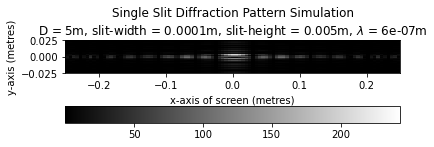

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
D = 5           # distance of screen

slitWidth = 0.0001

slitHeight = 0.005
# amplitude/intensity

a = 1
# wavelength

w = 0.0000006  

x1 = -0.25     
# assuming screen is a rectangle from (x1,y1) to (x2,y2)

x2 = 0.25

y1 = -0.025

y2 = 0.025
# linear resolution (no. of points per unit length)

lres = 2000 
 
 
# PERFORMING CALCULATIONS
# calculations are performed using numpy arrays and array methods

m, n = int((x2-x1)*lres), int((y2-y1)*lres)
 
# Obtaining sample points on the screen -
# X, Y and Z are mxn 2d arrays containing x coordinates, y coordinates
# and z coordinates of the screen sample-points respectively.

X = np.linspace(x1, x2, n)

Y = np.linspace(y1, y2, m)

X, Y = np.meshgrid(X, Y)

Z = np.ones((m, n))*D
 
 
# Dividing the slit into sample points
X, Y = np.meshgrid(np.linspace(x1, x2, n), np.linspace(y1, y2, m))
Z = np.ones((m, n)) * D
xcoords = np.linspace(-slitWidth/2, slitWidth/2, 20)
ycoords = np.linspace(-slitHeight/2, slitHeight/2, 100)
xcoords_mesh, ycoords_mesh = np.meshgrid(xcoords, ycoords)
L = np.sqrt((X[:,:,None,None] - xcoords_mesh[None,None,:,:])**2 + 
            (Y[:,:,None,None] - ycoords_mesh[None,None,:,:])**2 + 
            Z[:,:,None,None]**2)
theta = (L/w) * 2 * np.pi
A = np.sum(np.sin(theta), axis=(2,3))

A = np.abs(A)
 
#plotting
ax = plt.axes()
ax.set_aspect('equal')
plt.rc('text', usetex=False) 
plt.title("Single Slit Diffraction Pattern Simulation\nD = {}m, slit-width = {}m, slit-height = {}m, $\lambda$ = {}m".format(D, slitWidth, slitHeight, w))
plt.xlabel("x-axis of screen (metres)")
plt.ylabel("y-axis (metres)")
graph = plt.pcolormesh(
    X, Y, A, cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['black', 'white']))
plt.colorbar(graph, orientation='horizontal')
plt.show()
 

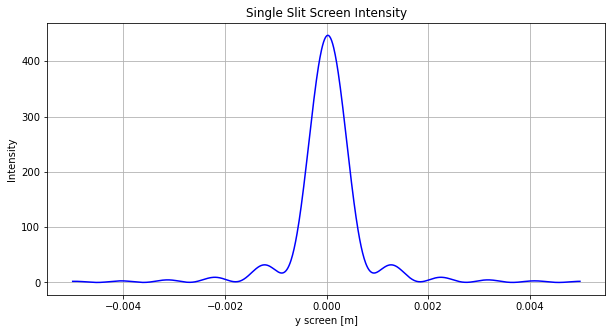

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
lam = 1e-6  # wavelength
f = 5
k = 2 * np.pi / lam
d = 1e-3  # width of slit
L = 1  # distance to screen
E0 = 1  # electric field strength

# Calculation settings
N = 20  # number of points
dy = d / N
ds = d / 100

# Initialize points and electric field components
pts = np.arange(-d/2, d/2 + dy, dy)
Er = np.zeros((len(pts), 2))  # Electric field vectors in complex form (Re, Im)

# Screen positions
s_values = np.arange(-5*d, 5*d, ds)
intensities = []

# Calculation
for s in s_values:
    Etot = 0
    s0 = np.sqrt(L**2 + s**2)  # s0 calculation
    for pt in pts:
        r = np.sqrt(L**2 + (s - pt)**2)
        phi = k * (r - s0)
        Er = E0 * np.exp(1j * phi)
        Etot += Er
    I = np.abs(Etot)**2
    intensities.append(I)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(s_values, intensities, color='blue')
plt.title("Single Slit Screen Intensity")
plt.xlabel("y screen [m]")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()


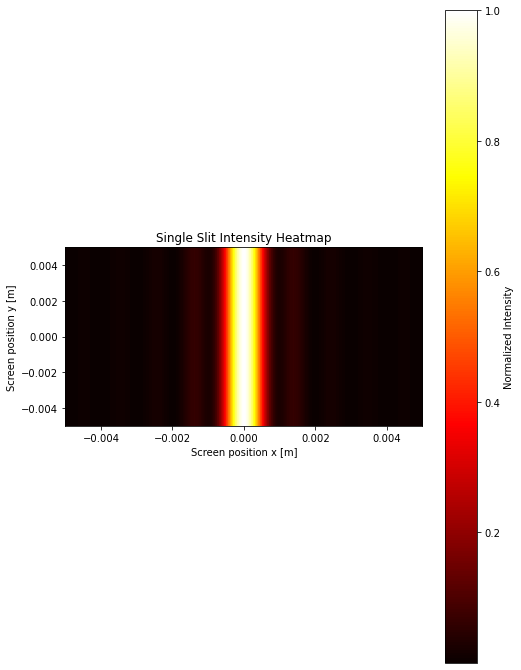

In [7]:
# Constants for the single slit interference
lam = 1e-6  # wavelength
k = 2 * np.pi / lam
d = 1e-3  # width of slit
L = 1  # distance to screen
E0 = 1  # electric field strength

# Calculation settings for the heatmap
N = 200  # number of points for a quicker computation
x_screen = np.linspace(-5e-3, 5e-3, N)  # screen range along x-axis
y_screen = np.linspace(-5e-3, 5e-3, N)  # screen range along y-axis
intensity_heatmap = np.zeros((N, N))

# Function to calculate the intensity at a given point on the screen
def single_slit_intensity(x, y, d, k, E0, L):
    # Integrate over slit width
    def slit(x0):
        return np.exp(1j * k * np.sqrt(L**2 + (x - x0)**2 + y**2))
    
    # Integration limits for the slit
    slit_limits = (-d / 2, d / 2)
    
    # Integrate using the composite trapezoidal rule
    slit_integral = np.trapz(slit(np.linspace(*slit_limits, N // 2)), dx=d / (N // 2))
    
    # The total electric field is the integral result
    Etot = slit_integral
    return np.abs(Etot)**2

# Calculate the intensity pattern for each point on the 2D screen
for ix, x in enumerate(x_screen):
    for iy, y in enumerate(y_screen):
        intensity_heatmap[ix, iy] = single_slit_intensity(x, y, d, k, E0, L)

# Normalize the intensity values for better visualization
intensity_heatmap /= np.max(intensity_heatmap)

# Plotting the heatmap
plt.figure(figsize=(8, 12))
plt.imshow(intensity_heatmap.T, cmap='hot', extent=(x_screen.min(), x_screen.max(), y_screen.min(), y_screen.max()), origin='lower', aspect=0.5)
plt.title("Single Slit Intensity Heatmap")
plt.xlabel("Screen position x [m]")
plt.ylabel("Screen position y [m]")
plt.colorbar(label='Normalized Intensity')
plt.show()


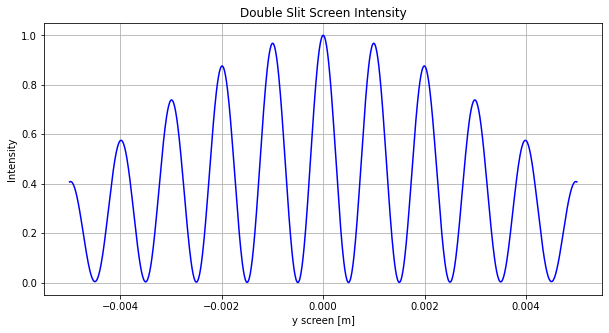

In [2]:
# Adjusting the previous code to ensure the graph is centered and has a similar appearance to the provided image

# Constants
lam = 1e-6  # wavelength
k = 2 * np.pi / lam
E0 = 1  # electric field strength
L = 1  # distance to screen

# Double slit configuration
d_slit = 1e-3  # slit separation
w_slit = d_slit / 10  # width of each slit

# Calculation settings
N = 1000  # number of points to calculate the field
y_screen = np.linspace(-5e-3, 5e-3, N)  # screen range
intensities_double_slit = []

# Function to calculate the intensity at a given point on the screen
def double_slit_intensity(y, w_slit, d_slit, k, E0, L):
    # Integrate over slit width
    def slit(x0):
        return np.exp(1j * k * np.sqrt(L**2 + (y - x0)**2))
    
    # Integration limits for the slits
    slit1_limits = (-d_slit / 2 - w_slit / 2, -d_slit / 2 + w_slit / 2)
    slit2_limits = (d_slit / 2 - w_slit / 2, d_slit / 2 + w_slit / 2)
    
    # Integrate using the composite trapezoidal rule
    slit1_integral = np.trapz(slit(np.linspace(*slit1_limits, N // 2)), dx=w_slit / (N // 2))
    slit2_integral = np.trapz(slit(np.linspace(*slit2_limits, N // 2)), dx=w_slit / (N // 2))
    
    # Total electric field is the sum of the fields from both slits
    Etot = slit1_integral + slit2_integral
    return np.abs(Etot)**2

# Calculate the intensity pattern
intensities_double_slit = [double_slit_intensity(y, w_slit, d_slit, k, E0, L) for y in y_screen]

# Normalizing the intensities to match the scale of the provided graph
intensities_double_slit = np.array(intensities_double_slit)
intensities_double_slit /= np.max(intensities_double_slit)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_screen, intensities_double_slit, color='blue')
plt.title("Double Slit Screen Intensity")
plt.xlabel("y screen [m]")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()


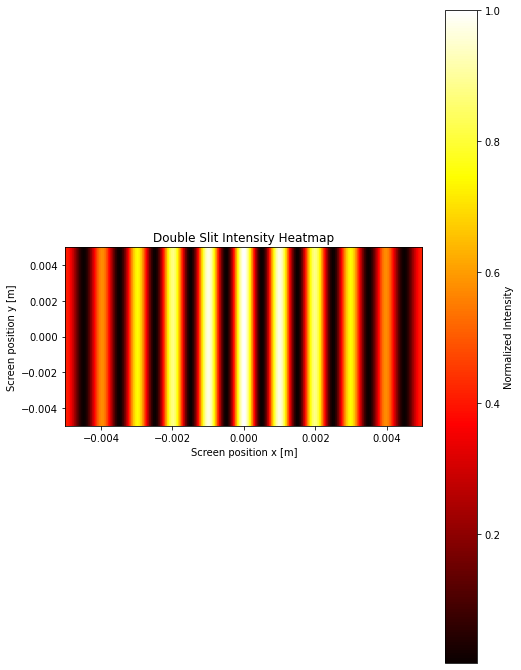

In [4]:
# Constants
lam = 1e-6  # wavelength
k = 2 * np.pi / lam
E0 = 1  # electric field strength
L = 1  # distance to screen

# Double slit configuration
d_slit = 1e-3  # slit separation
w_slit = d_slit / 10  # width of each slit

# Calculation settings
N = 200  # reduced number of points to calculate the field for quicker computation
x_screen = np.linspace(-5e-3, 5e-3, N)  # screen range along x-axis
y_screen = np.linspace(-5e-3, 5e-3, N)  # screen range along y-axis (for heatmap)
intensity_heatmap = np.zeros((N, N))

# Function to calculate the intensity at a given point on the screen
def double_slit_intensity(x, y, w_slit, d_slit, k, E0, L):
    # Integrate over slit width
    def slit(x0):
        return np.exp(1j * k * np.sqrt(L**2 + (x - x0)**2 + y**2))
    
    # Integration limits for the slits
    slit1_limits = (-d_slit / 2 - w_slit / 2, -d_slit / 2 + w_slit / 2)
    slit2_limits = (d_slit / 2 - w_slit / 2, d_slit / 2 + w_slit / 2)
    
    # Integrate using the composite trapezoidal rule
    slit1_integral = np.trapz(slit(np.linspace(*slit1_limits, N // 2)), dx=w_slit / (N // 2))
    slit2_integral = np.trapz(slit(np.linspace(*slit2_limits, N // 2)), dx=w_slit / (N // 2))
    
    # Total electric field is the sum of the fields from both slits
    Etot = slit1_integral + slit2_integral
    return np.abs(Etot)**2

# Calculate the intensity pattern for each point on the 2D screen
for ix, x in enumerate(x_screen):
    for iy, y in enumerate(y_screen):
        intensity_heatmap[ix, iy] = double_slit_intensity(x, y, w_slit, d_slit, k, E0, L)

# Normalize the intensity values for better visualization
intensity_heatmap /= np.max(intensity_heatmap)

# Plotting the heatmap
plt.figure(figsize=(8, 12))
plt.imshow(intensity_heatmap.T, cmap='hot', extent=(x_screen.min(), x_screen.max(), y_screen.min(), y_screen.max()), origin='lower', aspect=0.5)
plt.title("Double Slit Intensity Heatmap")
plt.xlabel("Screen position x [m]")
plt.ylabel("Screen position y [m]")
plt.colorbar(label='Normalized Intensity')
plt.show()
